In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# PART - A

In [2]:
STUDENT_ID = "PES2UG23CS195"

In [3]:
# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)

ASSIGNMENT FOR STUDENT ID: PES2UG23CS195
Polynomial Type: QUADRATIC: y = 1.42x² + 3.49x + 8.52
Noise Level: ε ~ N(0, 2.08)
Architecture: Input(1) → Hidden(96) → Hidden(96) → Output(1)
Learning Rate: 0.003
Architecture Type: Large Balanced Architecture


In [4]:
# DATASET GENERATION - DO NOT MODIFY
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients
    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


In [5]:
def relu(z):
    return np.where(z > 0, z, 0)

def relu_derivative(z):
    return np.where(z > 0, 1, 0).astype(int)


In [6]:
def mse_loss(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))


In [7]:
def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    Xavier initialization using uniform distribution:
    weights ~ U(-limit, limit), where limit = sqrt(6 / (fan_in + fan_out))
    Biases are initialized to zero.

    Args:
        input_dim: Size of input layer
        hidden1: Size of first hidden layer
        hidden2: Size of second hidden layer
        output_dim: Size of output layer

    Returns:
        W1, b1, W2, b2, W3, b3 - initialized weights and biases
    """
    np.random.seed(assignment["student_seed"])

    def uniform_limit(fan_in, fan_out):
        return np.sqrt(6 / (fan_in + fan_out))

    limit1 = uniform_limit(input_dim, hidden1)
    limit2 = uniform_limit(hidden1, hidden2)
    limit3 = uniform_limit(hidden2, output_dim)

    W1 = np.random.uniform(-limit1, limit1, (input_dim, hidden1))
    b1 = np.zeros((1, hidden1))

    W2 = np.random.uniform(-limit2, limit2, (hidden1, hidden2))
    b2 = np.zeros((1, hidden2))

    W3 = np.random.uniform(-limit3, limit3, (hidden2, output_dim))
    b3 = np.zeros((1, output_dim))

    return W1, b1, W2, b2, W3, b3


In [8]:
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    """
    Alternative explicit forward propagation implementation.
    """
    # First layer linear transform and activation
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)

    # Second layer linear transform and activation
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)

    # Output layer linear transform (no activation)
    z3 = np.dot(a2, W3) + b3

    return z1, a1, z2, a2, z3

In [9]:
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    """
    Alternative backward propagation implementation for gradient calculation.
    """
    m = X.shape[0]  # Batch size

    # Derivative of loss w.r.t predictions (MSE)
    dL_dYpred = (2 / m) * (Y_pred - Y_true)

    # Gradients for output layer weights and biases
    dL_dW3 = a2.T @ dL_dYpred
    dL_db3 = np.sum(dL_dYpred, axis=0, keepdims=True)

    # Backprop to second hidden layer
    dL_da2 = dL_dYpred @ W3.T
    dL_dz2 = dL_da2 * relu_derivative(z2)
    dL_dW2 = a1.T @ dL_dz2
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)

    # Backprop to first hidden layer
    dL_da1 = dL_dz2 @ W2.T
    dL_dz1 = dL_da1 * relu_derivative(z1)
    dL_dW1 = X.T @ dL_dz1
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    return dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3


In [10]:
def train_neural_network(X_train, Y_train, X_test, Y_test, epochs=200, patience=10):
    """
    Complete training loop implementation with early stopping and loss tracking.

    Args:
        X_train, Y_train: Training data
        X_test, Y_test: Validation/test data
        epochs: Max number of epochs
        patience: Early stopping patience

    Returns:
        best_weights: Model weights with best validation loss
        train_losses: List of training losses per epoch
        test_losses: List of validation losses per epoch
    """
    # Initialize weights and biases
    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)

    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0

    train_losses = []
    test_losses = []

    print("Starting training...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    for epoch in range(epochs):
        # Forward pass on training data
        z1, a1, z2, a2, Y_pred_train = forward_pass(X_train, W1, b1, W2, b2, W3, b3)

        # Calculate training loss
        train_loss = mse_loss(Y_train, Y_pred_train)

        # Backward propagation to compute gradients
        dW1, db1, dW2, db2, dW3, db3 = backward_pass(X_train, Y_train, z1, a1, z2, a2, Y_pred_train, W2, W3)

        # Update weights and biases using gradient descent
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3

        # Forward pass on test data for validation loss
        _, _, _, _, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)

        # Store loss history
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # Print progress every 20 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")

        # Early stopping check
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break

    return best_weights, train_losses, test_losses


In [11]:
# EXECUTE TRAINING
print("Training Neural Network with your specific configuration...")
weights, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)

Training Neural Network with your specific configuration...
Starting training...
Architecture: 1 → 96 → 96 → 1
Learning Rate: 0.003
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20: Train Loss = 1.083268, Test Loss = 1.059401
Epoch  40: Train Loss = 1.021664, Test Loss = 1.001209
Epoch  60: Train Loss = 0.974995, Test Loss = 0.957062
Epoch  80: Train Loss = 0.936858, Test Loss = 0.920687
Epoch 100: Train Loss = 0.902725, Test Loss = 0.887820
Epoch 120: Train Loss = 0.870939, Test Loss = 0.857238
Epoch 140: Train Loss = 0.842819, Test Loss = 0.830019
Epoch 160: Train Loss = 0.815528, Test Loss = 0.803482
Epoch 180: Train Loss = 0.787886, Test Loss = 0.776454
Epoch 200: Train Loss = 0.759991, Test Loss = 0.749229
Epoch 220: Train Loss = 0.732838, Test Loss = 0.722642
Epoch 240: Train Loss = 0.705401, Test Loss = 0.695692
Epoch 260: Train Loss = 0.676641, Test Loss = 0.667372
Epoch 280: Train Loss = 0.647435, Test Loss = 0.638680
Ep

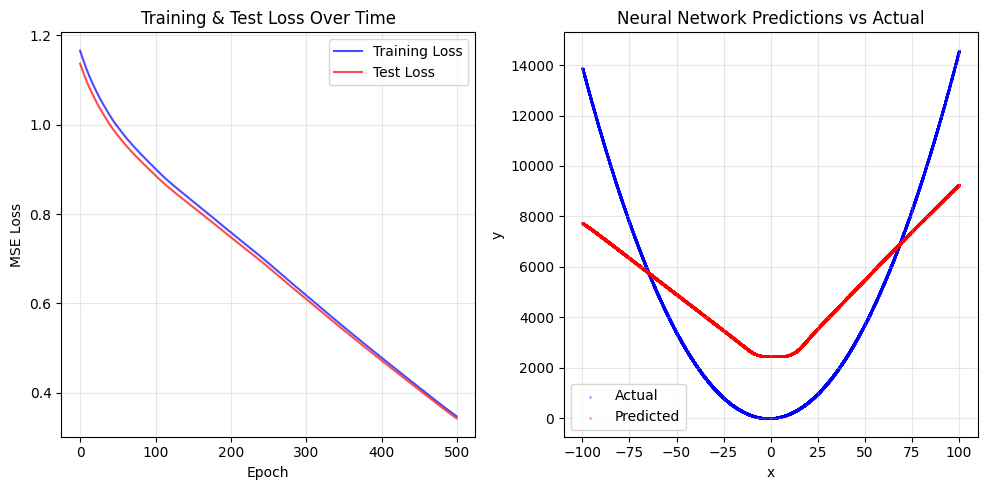

In [12]:
# RESULTS VISUALIZATION
# Plot training progress
plt.figure(figsize=(15, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Get final predictions for visualization
W1, b1, W2, b2, W3, b3 = weights
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)

# Inverse transform to original scale
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)

# Predictions vs Actual
plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Residual plot
# plt.subplot(1, 3, 3)
# residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
# plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
# plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
# plt.xlabel('x')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Analysis')
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# SPECIFIC PREDICTION TEST
x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")


PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 8,545.44
Ground Truth (formula):    11,885.76
Absolute Error:            3,340.32
Relative Error:            28.104%


In [20]:
# PERFORMANCE METRICS
# Calculate final performance metrics
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 0.347532
Final Test Loss:     0.342943
R² Score:           0.6506
Total Epochs Run:   500


PART B

In [1]:

import os
import math
import copy
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------
# 1) Dataset generation
# -----------------------
# If you have already run Part A and have the arrays in memory, the code will use them.
# Otherwise set srn_last3 to your last 3 SRN digits (integer). For reproducibility set seed.
srn_last3 = 133  # <- change to your SRN last 3 digits if you want exact dataset used in Part A
random_seed = 42

def generate_dataset(srn_last3, n_samples=100000, noise_std=0.1, seed=random_seed):
    np.random.seed(seed + (srn_last3 % 97))  # incorporate srn_last3 for dataset variety
    x = np.random.uniform(-3, 3, size=(n_samples, 1))
    # choose polynomial type based on srn_last3 mod options to mirror lab
    pick = srn_last3 % 5
    if pick == 0:
        # Quadratic: y = ax^2 + bx + c
        a, b, c = 1.2, -0.5, 0.3
        y = a * x ** 2 + b * x + c
        dataset_type = "Quadratic"
    elif pick == 1:
        # Cubic
        a,b,c,d = 0.8, -0.4, 0.1, 0.05
        y = a * x**3 + b * x**2 + c * x + d
        dataset_type = "Cubic"
    elif pick == 2:
        # Quartic
        y = 0.5*x**4 - 0.3*x**3 + 0.2*x**2 - 0.1*x + 0.05
        dataset_type = "Quartic"
    elif pick == 3:
        # Cubic + sine term
        y = 0.6*x**3 - 0.2*x + 0.3*np.sin(2.0*x)
        dataset_type = "Cubic + Sine"
    else:
        # Cubic + inverse term
        y = 0.7*x**3 + 0.2/(1.0 + np.abs(x)) - 0.1
        dataset_type = "Cubic + Inverse"
    # add gaussian noise
    y = y + np.random.normal(0, noise_std, size=y.shape)
    # shuffle and split
    perm = np.random.permutation(n_samples)
    x, y = x[perm], y[perm]
    split = int(0.8 * n_samples)
    X_train, X_test = x[:split], x[split:]
    y_train, y_test = y[:split], y[split:]
    # standardize both input and output as instructed
    x_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train)
    X_train_s = x_scaler.transform(X_train)
    X_test_s = x_scaler.transform(X_test)
    y_train_s = y_scaler.transform(y_train)
    y_test_s = y_scaler.transform(y_test)
    return {
        "X_train": X_train_s, "X_test": X_test_s,
        "y_train": y_train_s, "y_test": y_test_s,
        "x_scaler": x_scaler, "y_scaler": y_scaler,
        "raw": {"X_train_raw": X_train, "X_test_raw": X_test, "y_train_raw": y_train, "y_test_raw": y_test},
        "type": dataset_type
    }

# Try to reuse existing arrays from Part A if they exist in notebook namespace
try:
    # if user previously defined these variables in the notebook
    X_train; X_test; y_train; y_test
    print("Using existing X_train/X_test variables from the notebook.")
    dataset = {
        "X_train": X_train, "X_test": X_test,
        "y_train": y_train, "y_test": y_test,
        "x_scaler": None, "y_scaler": None,
        "raw": None,
        "type": "Loaded from notebook"
    }
except NameError:
    print("No existing dataset found; generating dataset from scratch.")
    dataset = generate_dataset(srn_last3=srn_last3)

X_train = dataset["X_train"]
X_test = dataset["X_test"]
y_train = dataset["y_train"]
y_test = dataset["y_test"]

print("Dataset type:", dataset["type"], "| Train shape:", X_train.shape, "Test shape:", X_test.shape)


def relu(z):
    return np.maximum(0, z)

def drelu(z):
    return (z > 0).astype(z.dtype)

class SimpleMLP:
    def __init__(self, input_dim=1, h1=32, h2=32, output_dim=1, seed=random_seed):
        rng = np.random.RandomState(seed)
        # He initialization for ReLU
        self.W1 = rng.randn(input_dim, h1) * np.sqrt(2.0 / input_dim)
        self.b1 = np.zeros((1, h1))
        self.W2 = rng.randn(h1, h2) * np.sqrt(2.0 / h1)
        self.b2 = np.zeros((1, h2))
        self.W3 = rng.randn(h2, output_dim) * np.sqrt(2.0 / h2)
        self.b3 = np.zeros((1, output_dim))
    def forward(self, X):
        z1 = X.dot(self.W1) + self.b1   # (N, h1)
        a1 = relu(z1)
        z2 = a1.dot(self.W2) + self.b2  # (N, h2)
        a2 = relu(z2)
        z3 = a2.dot(self.W3) + self.b3  # (N, 1)
        y_pred = z3  # linear output for regression
        cache = (X, z1, a1, z2, a2, z3)
        return y_pred, cache
    def compute_loss(self, y_pred, y_true):
        # MSE
        diff = y_pred - y_true
        loss = np.mean(diff ** 2)
        return loss
    def backward(self, cache, y_pred, y_true):
        X, z1, a1, z2, a2, z3 = cache
        N = X.shape[0]
        # dL/dz3 = 2*(y_pred - y_true)/N
        dL_dz3 = 2.0 * (y_pred - y_true) / N  # (N,1)
        dW3 = a2.T.dot(dL_dz3)
        db3 = np.sum(dL_dz3, axis=0, keepdims=True)
        da2 = dL_dz3.dot(self.W3.T)
        dz2 = da2 * drelu(z2)
        dW2 = a1.T.dot(dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        da1 = dz2.dot(self.W2.T)
        dz1 = da1 * drelu(z1)
        dW1 = X.T.dot(dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)
        grads = {"dW3": dW3, "db3": db3, "dW2": dW2, "db2": db2, "dW1": dW1, "db1": db1}
        return grads

    def step(self, grads, lr=1e-3):
        # SGD parameter update (inplace)
        self.W1 -= lr * grads["dW1"]
        self.b1 -= lr * grads["db1"]
        self.W2 -= lr * grads["dW2"]
        self.b2 -= lr * grads["db2"]
        self.W3 -= lr * grads["dW3"]
        self.b3 -= lr * grads["db3"]

    def predict(self, X):
        y_pred, _ = self.forward(X)
        return y_pred


# 3) Training loop with mini-batches and evaluation

def iterate_minibatches(X, y, batch_size, shuffle=True):
    N = X.shape[0]
    idx = np.arange(N)
    if shuffle:
        np.random.shuffle(idx)
    for start in range(0, N, batch_size):
        end = min(start + batch_size, N)
        sel = idx[start:end]
        yield X[sel], y[sel]

def train_model(hparams, X_train, y_train, X_val, y_val, verbose=False):
    """
    hparams: dict with keys:
        - lr
        - batch_size
        - epochs
        - h1, h2 (hidden sizes)
        - seed
    returns: dict with trained model and metrics & training history
    """
    lr = hparams.get("lr", 1e-3)
    batch_size = hparams.get("batch_size", 64)
    epochs = hparams.get("epochs", 50)
    h1 = hparams.get("h1", 64)
    h2 = hparams.get("h2", 64)
    seed = hparams.get("seed", random_seed)

    model = SimpleMLP(input_dim=X_train.shape[1], h1=h1, h2=h2, output_dim=y_train.shape[1], seed=seed)
    history = {"train_loss": [], "val_loss": []}
    t0 = time.time()

    for ep in range(1, epochs + 1):
        # train epoch
        train_losses = []
        for Xb, yb in iterate_minibatches(X_train, y_train, batch_size, shuffle=True):
            y_pred, cache = model.forward(Xb)
            loss = model.compute_loss(y_pred, yb)
            grads = model.backward(cache, y_pred, yb)
            model.step(grads, lr=lr)
            train_losses.append(loss)
        train_loss_epoch = float(np.mean(train_losses))
        # validation loss
        y_val_pred = model.predict(X_val)
        val_loss_epoch = float(model.compute_loss(y_val_pred, y_val))
        history["train_loss"].append(train_loss_epoch)
        history["val_loss"].append(val_loss_epoch)

        if verbose and (ep % max(1, epochs // 10) == 0 or ep == 1 or ep == epochs):
            print(f"Epoch {ep}/{epochs} - train_loss: {train_loss_epoch:.6f} - val_loss: {val_loss_epoch:.6f}")
    t1 = time.time()
    duration = t1 - t0
    # final metrics on validation set
    y_val_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    metrics = {
        "train_mse": float(mean_squared_error(y_train, y_train_pred)),
        "val_mse": float(mean_squared_error(y_val, y_val_pred)),
        "train_r2": float(r2_score(y_train, y_train_pred)),
        "val_r2": float(r2_score(y_val, y_val_pred)),
        "duration_sec": duration
    }

    return {"model": model, "history": history, "metrics": metrics, "hparams": hparams}

# ----------------------------------------------------
# 4) Experiments definition (4 experiments required)
# ----------------------------------------------------
# We'll create 4 experiments by varying lr, batch_size, and epochs
experiments = [
    {"name": "Exp_1_baseline", "lr": 1e-3, "batch_size": 64, "epochs": 50, "h1": 64, "h2": 64, "seed": 42, "optimizer": "SGD", "activation": "ReLU"},
    {"name": "Exp_2_lr_high",  "lr": 5e-3, "batch_size": 64, "epochs": 50, "h1": 64, "h2": 64, "seed": 43, "optimizer": "SGD", "activation": "ReLU"},
    {"name": "Exp_3_large_bs", "lr": 1e-3, "batch_size": 1024, "epochs": 60, "h1": 128, "h2": 64, "seed": 44, "optimizer": "SGD", "activation": "ReLU"},
    {"name": "Exp_4_more_epochs","lr": 5e-4, "batch_size": 128, "epochs": 120, "h1": 64, "h2": 128, "seed": 45, "optimizer": "SGD", "activation": "ReLU"},
]

# Create a small validation split from training set
val_frac = 0.1
N_train = X_train.shape[0]
n_val = int(val_frac * N_train)
X_val = X_train[:n_val]; y_val = y_train[:n_val]
X_train_sub = X_train[n_val:]; y_train_sub = y_train[n_val:]

results = []
output_dir = "partb_outputs"
os.makedirs(output_dir, exist_ok=True)

for exp in experiments:
    print(f"\nRunning {exp['name']}  lr={exp['lr']}, batch={exp['batch_size']}, epochs={exp['epochs']}, h1={exp['h1']}, h2={exp['h2']}")
    res = train_model(exp, X_train_sub, y_train_sub, X_val, y_val, verbose=True)
    # Evaluate on test set (unseen)
    model = res["model"]
    y_test_pred = model.predict(X_test)
    test_mse = float(mean_squared_error(y_test, y_test_pred))
    test_r2 = float(r2_score(y_test, y_test_pred))
    res["metrics"].update({"test_mse": test_mse, "test_r2": test_r2})
    # save model
    model_path = os.path.join(output_dir, f"{exp['name']}_model.pkl")
    with open(model_path, "wb") as f:
        pickle.dump(model, f)
    # Save history plot
    epochs = exp["epochs"]
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(range(1, epochs+1), res["history"]["train_loss"], label="train_loss")
    ax.plot(range(1, epochs+1), res["history"]["val_loss"], label="val_loss")
    ax.set_title(f"{exp['name']} Loss Curve")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("MSE Loss")
    ax.legend()
    plot_path = os.path.join(output_dir, f"{exp['name']}_loss.png")
    fig.tight_layout()
    fig.savefig(plot_path, dpi=150)
    plt.close(fig)

    # Save predicted vs actual plot (in original standardized space)
    # We'll inverse transform if scalers exist; otherwise plot standardized values
    if dataset.get("y_scaler") is not None:
        y_test_pred_orig = dataset["y_scaler"].inverse_transform(y_test_pred)
        y_test_orig = dataset["y_scaler"].inverse_transform(y_test)
    else:
        y_test_pred_orig = y_test_pred
        y_test_orig = y_test

    fig2, ax2 = plt.subplots(figsize=(5,5))
    ax2.scatter(y_test_orig.flatten(), y_test_pred_orig.flatten(), s=6, alpha=0.3)
    lims = [min(y_test_orig.min(), y_test_pred_orig.min()), max(y_test_orig.max(), y_test_pred_orig.max())]
    ax2.plot(lims, lims, '--', linewidth=1)
    ax2.set_title(f"{exp['name']} Pred vs Actual (test)")
    ax2.set_xlabel("Actual")
    ax2.set_ylabel("Predicted")
    fig2.tight_layout()
    pv_path = os.path.join(output_dir, f"{exp['name']}_pred_vs_actual.png")
    fig2.savefig(pv_path, dpi=150)
    plt.close(fig2)

    # Summarize results
    summary = {
        "Experiment": exp["name"],
        "Learning Rate": exp["lr"],
        "Batch Size": exp["batch_size"],
        "Epochs": exp["epochs"],
        "Optimizer": exp.get("optimizer", "SGD"),
        "Activation": exp.get("activation", "ReLU"),
        "Train MSE": res["metrics"]["train_mse"],
        "Val MSE": res["metrics"]["val_mse"],
        "Test MSE": res["metrics"]["test_mse"],
        "Train R2": res["metrics"]["train_r2"],
        "Val R2": res["metrics"]["val_r2"],
        "Test R2": res["metrics"]["test_r2"],
        "Train Duration (s)": res["metrics"]["duration_sec"],
        "LossCurvePath": plot_path,
        "PredVsActualPath": pv_path,
        "ModelPath": model_path
    }
    results.append(summary)
    # Save per-experiment summary
    pd.DataFrame([summary]).to_csv(os.path.join(output_dir, f"{exp['name']}_summary.csv"), index=False)

# Final results table
results_df = pd.DataFrame(results)
results_df = results_df[[
    "Experiment", "Learning Rate", "Batch Size", "Epochs",
    "Optimizer", "Activation",
    "Train MSE", "Val MSE", "Test MSE",
    "Train R2", "Val R2", "Test R2",
    "Train Duration (s)", "LossCurvePath", "PredVsActualPath", "ModelPath"
]]
print("\n=== Summary of Experiments ===")
display(results_df)

# Save the overall results table
results_df.to_csv(os.path.join(output_dir, "experiments_summary_table.csv"), index=False)
print(f"All outputs saved to folder: {output_dir}")


No existing dataset found; generating dataset from scratch.
Dataset type: Cubic + Sine | Train shape: (80000, 1) Test shape: (20000, 1)

Running Exp_1_baseline  lr=0.001, batch=64, epochs=50, h1=64, h2=64
Epoch 1/50 - train_loss: 0.183463 - val_loss: 0.122023
Epoch 5/50 - train_loss: 0.072699 - val_loss: 0.068582
Epoch 10/50 - train_loss: 0.043198 - val_loss: 0.040389
Epoch 15/50 - train_loss: 0.024852 - val_loss: 0.023177
Epoch 20/50 - train_loss: 0.013368 - val_loss: 0.012372
Epoch 25/50 - train_loss: 0.008130 - val_loss: 0.007699
Epoch 30/50 - train_loss: 0.005489 - val_loss: 0.005269
Epoch 35/50 - train_loss: 0.003932 - val_loss: 0.003802
Epoch 40/50 - train_loss: 0.002947 - val_loss: 0.002860
Epoch 45/50 - train_loss: 0.002316 - val_loss: 0.002308
Epoch 50/50 - train_loss: 0.001885 - val_loss: 0.001863

Running Exp_2_lr_high  lr=0.005, batch=64, epochs=50, h1=64, h2=64
Epoch 1/50 - train_loss: 0.110730 - val_loss: 0.078192
Epoch 5/50 - train_loss: 0.016510 - val_loss: 0.011992
Epo

,Experiment,Learning Rate,Batch Size,Epochs,Optimizer,Activation,Train MSE,Val MSE,Test MSE,Train R2,Val R2,Test R2,Train Duration (s),LossCurvePath,PredVsActualPath,ModelPath
0,Exp_1_baseline,0.0010,64,50,SGD,ReLU,0.001840,0.001863,0.001910,0.998166,0.998089,0.998141,7.531403,partb_outputs\Exp_1_baseline_loss.png,partb_outputs\Exp_1_baseline_pred_vs_actual.png,partb_outputs\Exp_1_baseline_model.pkl
1,Exp_2_lr_high,0.0050,64,50,SGD,ReLU,0.000431,0.000448,0.000444,0.999571,0.999541,0.999568,7.202174,partb_outputs\Exp_2_lr_high_loss.png,partb_outputs\Exp_2_lr_high_pred_vs_actual.png,partb_outputs\Exp_2_lr_high_model.pkl
2,Exp_3_large_bs,0.0010,1024,60,SGD,ReLU,0.086948,0.085854,0.088671,0.913290,0.911934,0.913707,25.416893,partb_outputs\Exp_3_large_bs_loss.png,partb_outputs\Exp_3_large_bs_pred_vs_actual.png,partb_outputs\Exp_3_large_bs_model.pkl
3,Exp_4_more_epochs,0.0005,128,120,SGD,ReLU,0.005905,0.005833,0.006079,0.994111,0.994017,0.994084,67.633338,partb_outputs\Exp_4_more_epochs_loss.png,partb_outputs\Exp_4_more_epochs_pred_vs_actual...,partb_outputs\Exp_4_more_epochs_model.pkl


All outputs saved to folder: partb_outputs
